<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/movie_recommender_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:

movie_titles = pd.read_csv(movie_titles_path)
data = pd.read_csv(data, sep = '\t', names = 'user_id item_id ratings timestamp'.split())
data.sample(5)

,user_id,item_id,ratings,timestamp
4922,1,140,1,878543133
57463,748,193,3,879454789
85772,394,418,4,880887462
15552,10,521,4,877892110
32591,110,258,4,886987183


In [ ]:
data

In [ ]:
pd.to_datetime(data['timestamp'], unit = 's').sort_values()

In [ ]:
df = pd.merge(left = data, right = movie_titles, on = 'item_id')#left_on = 'item_id', right_on = 'item_id')
df.sample(5)

,user_id,item_id,ratings,timestamp,title
5022,457,546,2,882393860,Broken Arrow (1996)
65413,943,9,3,875501960,Dead Man Walking (1995)
6527,23,88,3,874787410,Sleepless in Seattle (1993)
74678,851,223,4,875731567,Sling Blade (1996)
7912,561,241,2,885809119,"Last of the Mohicans, The (1992)"


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
pip install pandas_profiling==2.9.0

In [ ]:
ProfileReport(df)

In [ ]:
'Broken Arrow (1996)'.

In [ ]:
import re

In [ ]:
r = re.match('\(\d+\)', 'Broken Arrow (1996)')
print(r)

None


In [ ]:
re.findall('(.)', 'Broken Arrow (1996)')

['B',
 'r',
 'o',
 'k',
 'e',
 'n',
 ' ',
 'A',
 'r',
 'r',
 'o',
 'w',
 ' ',
 '(',
 '1',
 '9',
 '9',
 '6',
 ')']

In [ ]:
s = 'Broken Arrow (1996)'
s.find('(')

13

In [ ]:
s.find(')')

18

In [ ]:
df['title'][df['title'].find('(')+1:df['title'].find(')')]

AttributeError: ignored

In [ ]:
df['title'].apply(lambda x: x[x.find('(')+1 : x.find(')')])

0                   1977
1                   1977
2                   1977
3                   1977
4                   1977
               ...      
99998               1962
99999               1996
100000              1996
100001    Saimt el Qusur
100002              1995
Name: title, Length: 100003, dtype: object

In [ ]:
len(s)

19

In [ ]:
s[-5:-1]

'1996'

In [ ]:
df['title'].apply(lambda x:x[-5:-1])

0         1977
1         1977
2         1977
3         1977
4         1977
          ... 
99998     1962
99999     1996
100000    1996
100001    1994
100002    1995
Name: title, Length: 100003, dtype: object

In [ ]:
df['year'] = df['title'].apply(lambda x:x[-5:-1])
df.sample(10)

,user_id,item_id,ratings,timestamp,title,year
24036,236,273,1,890116670,Heat (1995),1995
30624,618,127,5,891307619,"Godfather, The (1972)",1972
13642,73,480,4,888625753,North by Northwest (1959),1959
82923,286,771,2,877535119,Johnny Mnemonic (1995),1995
38953,715,227,3,875964272,Star Trek VI: The Undiscovered Country (1991),1991
5209,935,546,4,884472743,Broken Arrow (1996),1996
22955,22,405,1,878888067,Mission: Impossible (1996),1996
38491,1,160,4,875072547,Glengarry Glen Ross (1992),1992
18806,847,151,4,878775914,Willy Wonka and the Chocolate Factory (1971),1971
20315,330,385,5,876546378,True Lies (1994),1994


In [ ]:
df['year'].sort_values()

99274    ) (V
99273    ) (V
99272    ) (V
99271    ) (V
99270    ) (V
         ... 
84862    know
84867    know
84866    know
84864    know
84865    know
Name: year, Length: 100003, dtype: object

In [ ]:
df['']

In [ ]:
df['title'].iloc[[99274, 
99273, 
99272,
99271,
99270,
84862,
84867,
84866,
84864,
84865]]

99274    Land Before Time III: The Time of the Great Gi...
99273    Land Before Time III: The Time of the Great Gi...
99272    Land Before Time III: The Time of the Great Gi...
99271    Land Before Time III: The Time of the Great Gi...
99270    Land Before Time III: The Time of the Great Gi...
84862                                              unknown
84867                                              unknown
84866                                              unknown
84864                                              unknown
84865                                              unknown
Name: title, dtype: object

In [ ]:
df['title'].iloc[99274]

'Land Before Time III: The Time of the Great Giving (1995) (V)'

In [ ]:
df_stats = df.groupby('title')['ratings'].describe()[['mean', 'count']].reset_index()

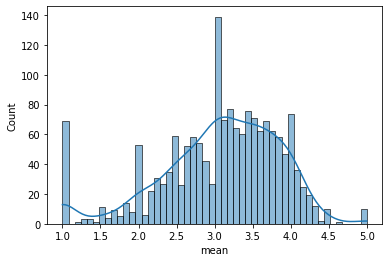

In [ ]:
sns.histplot(data = df_stats, x = '+mean', bins = 50, kde = True)

In [ ]:
userid_movietitle = pd.pivot_table(data = df, index = 'user_id', columns = 'title', values = 'ratings')
userid_movietitle

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
titanic = userid_movietitle['Titanic (1997)']
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [ ]:
# get correlation between movie v user dataframe and selected movie dataframe

pd.DataFrame(userid_movietitle.corrwith(titanic)).dropna().sort_values(by = 0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,0
title,
Alphaville (1965),-1.0
"Stars Fell on Henrietta, The (1995)",-1.0
"Good Man in Africa, A (1994)",-1.0
Caro Diario (Dear Diary) (1994),-1.0
Children of the Revolution (1996),-1.0
...,...
"Simple Wish, A (1997)",1.0
"Newton Boys, The (1998)",1.0
"Pest, The (1997)",1.0
